In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Create a NumPy array with the initial data
df = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8]

])

In [33]:
# Convert the NumPy array to a pandas DataFrame and display descriptive statistics
pd.DataFrame(df).describe()

,0,1,2
count,9.000000,9.000000,9.000000
mean,1.888889,2.022222,1.033333
std,0.789691,0.815135,0.479583
min,0.500000,0.700000,0.300000
25%,1.500000,1.600000,0.800000
50%,2.000000,2.200000,1.100000
75%,2.300000,2.700000,1.400000
max,3.100000,3.000000,1.700000


In [35]:
# Create another NumPy array with the same data
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8]

])

In [36]:
# Standardize the data using Z-score normalization
# z = (x - u) / sigma
standrdized_data = (data - data.mean()) / data.std()

In [37]:
# Display the standardized data
standrdized_data

array([[ 1.06335716,  0.93852828, -0.55941833],
       [-1.43322052, -1.18356275, -1.68287829],
       [ 0.68887051,  1.5626727 , -0.30976056],
       [ 0.31438386,  0.68887051, -0.68424722],
       [ 1.81233047,  1.68750158,  0.06472609],
       [ 0.81369939,  1.31301493, -0.18493168],
       [ 0.43921274, -0.0601028 , -0.93390499],
       [-0.8090761 , -0.68424722, -1.55804941],
       [-0.18493168, -0.0601028 , -1.05873387]])

In [55]:
# Calculate the covariance matrix of the standardized data
cov_matrix=np.cov(standrdized_data.T)

In [56]:
# Display the covariance matrix
cov_matrix

array([[0.97172644, 0.92368117, 0.55966249],
       [0.92368117, 1.03535397, 0.59861812],
       [0.55966249, 0.59861812, 0.35839176]])

In [57]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
# cov(z) * v = lambda * v, where v is the eigenvector and lambda is the eigenvalue
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [58]:
# Print the eigenvalues and eigenvectors
print("EIGEN VALUES")
print(eig_val)

print("\n")
print("EIGEN VECTOR")
print(eig_vec)

EIGEN VALUES
[2.2776068  0.08139749 0.00646789]


EIGEN VECTOR
[[ 0.63729467  0.75620329 -0.14836473]
 [ 0.66307838 -0.63619958 -0.39443269]
 [ 0.39266087 -0.1529924   0.90686866]]


In [59]:
# Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[sorted_indices]
eig_vec = eig_vec[:, sorted_indices]

In [60]:
# Select the top 2 eigenvectors
eig_vecs_subset = eig_vec[:, :2]
print(eig_vecs_subset)

[[ 0.63729467  0.75620329]
 [ 0.66307838 -0.63619958]
 [ 0.39266087 -0.1529924 ]]


In [63]:
# Transform the original standardized data by projecting it onto the top 2 eigenvectors
reduced_data = standrdized_data.dot(eig_vecs_subset)
# Create a pandas DataFrame from the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
# Print the reduced data
print("Reduced Data (after PCA):",reduced_df)

Reduced Data (after PCA):         PC1       PC2
0  1.080328  0.292610
1 -2.358979 -0.073356
2  1.353557 -0.425855
3  0.388453 -0.095836
4  2.299350  0.287000
5  1.316583 -0.191724
6 -0.126653  0.513252
7 -1.581114  0.061862
8 -0.573432  0.060370


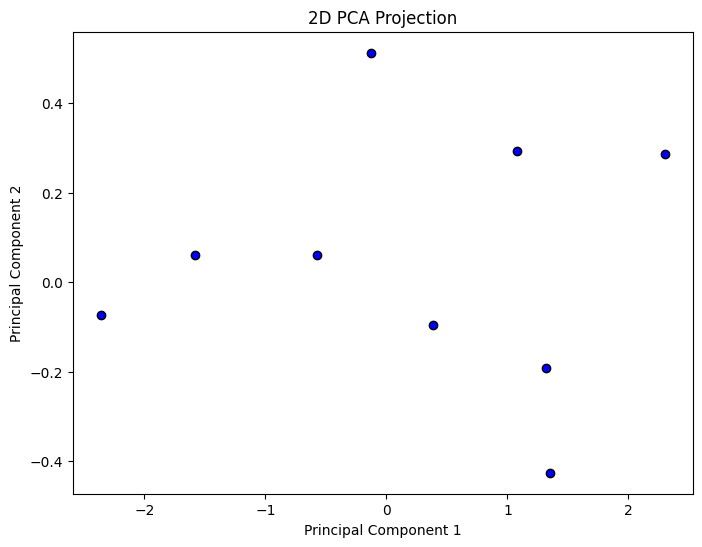

In [64]:
# Visualize the reduced data in a 2D scatter plot
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()